In [4]:
from pynsia.pointcloud import PointCloud
import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [5]:
#fig = plt.figure(figsize=(8, 6))
#ax = fig.gca(projection='3d')
#ax.set_xlim((-30, 30))
#ax.set_ylim((-30, 30))
#ax.set_zlim((-30, 30))
#ax.scatter(pc.points[:,0], pc.points[:,1], pc.points[:,2], s=.05);

<IPython.core.display.Javascript object>


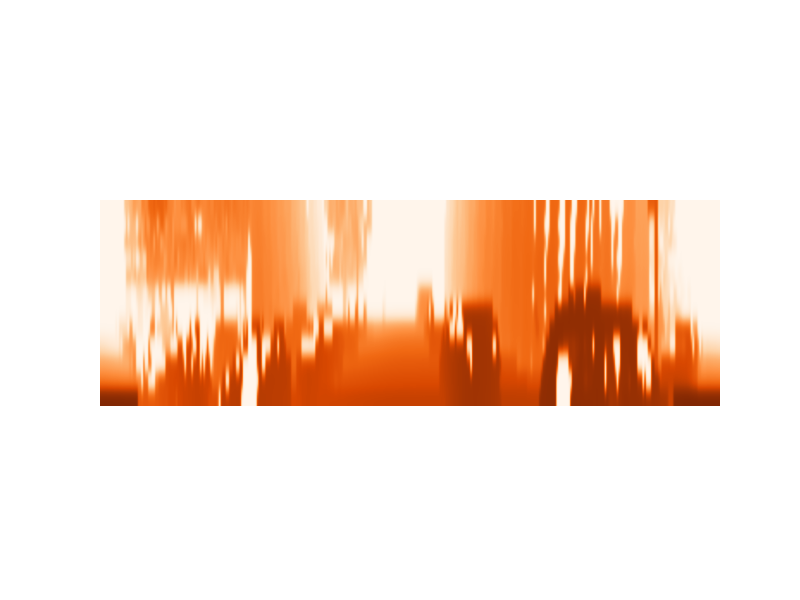

KeyboardInterrupt: 

In [9]:
import pandas as pd

df = pd.read_csv('/home/blazaid/Projects/data-phd/sync/edgar/training/dataset.csv')
df['pointclouds_path'] = df['pointclouds_path'].str.replace('/media/blazaid/Saca/Phd/data', '/home/blazaid/Projects/data-phd')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.show()
for path in df['pointclouds_path']:
    if not pd.isnull(path):
        pc = PointCloud.load(path)
        deepmap = pc.to_deepmap(h_range=(0, 360), v_range=(-15, 15), h_res=1, v_res=2.5, max_dist=25, normalize=True)

        ax.clear()
        ax.imshow(deepmap, interpolation='gaussian', cmap='Oranges')
        ax.set_aspect(10)
        ax.set_axis_off()
        fig.canvas.draw()